In [1]:
# Import Packages Needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Question Bank

* [What is the Most Popular Breed Overall?](#question_1)

* [Popularity Of Breeds over a time period from 2016 - 2019](#question_2)

* [Popularity Of Breed Per Location/Club](#question_3)

* [Distribution of Registrations Of Breed Per Location/Club](#question_4)

* [Main Insight](#insight_1)

# Purpose Of This NoteBook

*  Exploring the Dog Breed Dataset

*  Story Telling Based on One Variable

*  Using Hypothesis Testing or any other testing with supported evidence



# Data Validation

The orginal dataset has **130 rows** and **5 columns**

Columns Descriptions:
* **Year** -  Indicates the observation year of collection. Ranges from **2006 Till 2019**

* **Club** - Indicates the club where the breed records where collected from, **17 unique clubs**

* **Position** -  Indicates the position of each breed based on year, **range between 1 ~ 30**

* **Breed** - Indicates the type of breed of each dog, there are a total of **46 Unique breeds** 

* **Registrations** - Represents the number of dogs registered **based on club, breed and year**, will be a **decimal number**

# Data Cleaning

* Year Columns was expected to be an **Int** Type, which it was

* Club Columns has an unexpected Spacing within it's "Column Name", which was dealt with [Here](#col_name_clean)

* Registrations Values were expected to be **float** Type, but it was an object type, hence all values were converted to Float types.

In [2]:
# Load Up Csv For Exploration
df = pd.read_csv("/kaggle/input/list-of-most-popular-dog-breeds/dog.csv")

### Column Clean  <a class="anchor"  id="col_name_clean"></a>

> * Output was 'Clubxa0', we were expecting 'Club'. Resulted in unexpected errors

In [3]:
# Cleaning Column Name
df.rename(columns={df.columns[1]: 'Club'}, inplace=True)

# Data Transformation


### Transforming "Registrations" Value
> The need for this transformation is due to the fact, registrations represents the Number of breeds recoded by each club and year. Hence, it being a **"decimal"** number doesn't show much value in this reports case.

In [4]:
df['Registrations'] = round(df['Registrations'].str.replace("-","0").astype('float'))

# Summary Statistics

We'll go over the basic summary statistics, before diving deeper into our Analysis

In [5]:
df.nunique()

Year              6
Club             17
Position         30
Breed            46
Registrations    43
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           130 non-null    int64  
 1   Club           130 non-null    object 
 2   Position       130 non-null    int64  
 3   Breed          130 non-null    object 
 4   Registrations  130 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ KB


# Data Discovery And Visualization

### What is the most popular breed? <a class="anchor"  id="question_1"></a>

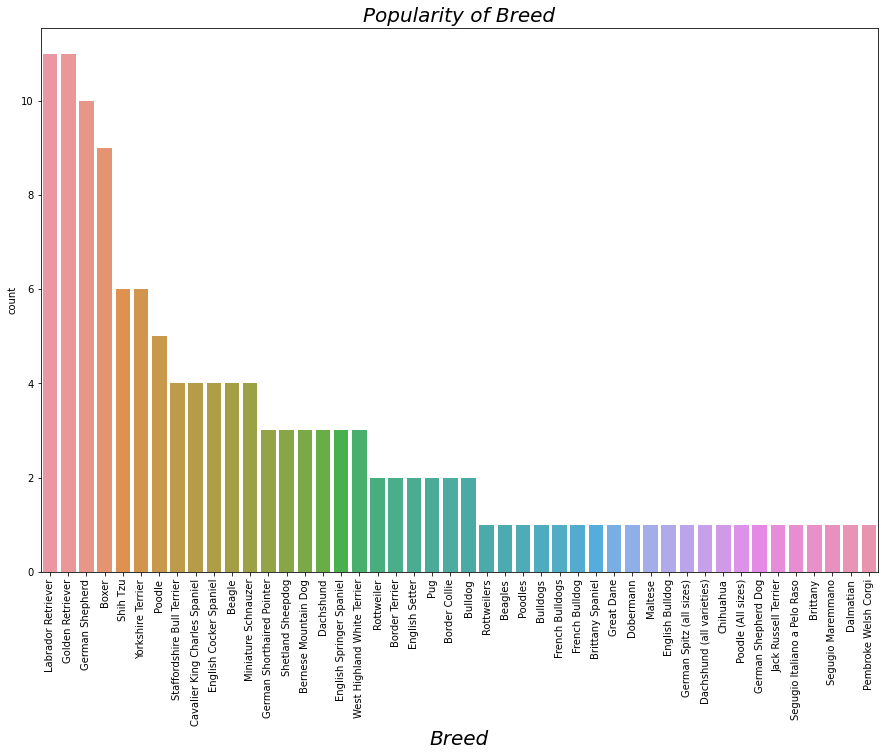

In [7]:
fig = plt.figure(figsize=(15,10))

plt.xticks(rotation=90)

sns.countplot(data=df, x='Breed', order=df["Breed"].value_counts().index)

plt.title("Popularity of Breed", fontsize=20, fontstyle='oblique')
plt.xlabel("Breed", fontsize=20, fontstyle='oblique')

plt.show()

> We had over 46 unqiue breeds, out of which the **most popular** is **"Labrador Retriever"** along with **"Golden Retriever"**. 
> 
> Whereas the popularity of "German Shepherd" wasn't much off from the other top breeds.

## Popularity of Breeds Over Time 🐶📈  <a class="anchor"  id="question_2"></a>


In [8]:
# Computing Top 3 Dogs Breeds By Registration Over Time

Top_3_Breeds = df.groupby("Breed")["Registrations"].sum().reset_index(name="Amount")
Top_3_Breeds = Top_3_Breeds.sort_values('Amount').tail(3)

Top_3_Breeds

,Breed,Amount
45,Yorkshire Terrier,144.0
26,Golden Retriever,168.0
29,Labrador Retriever,429.0


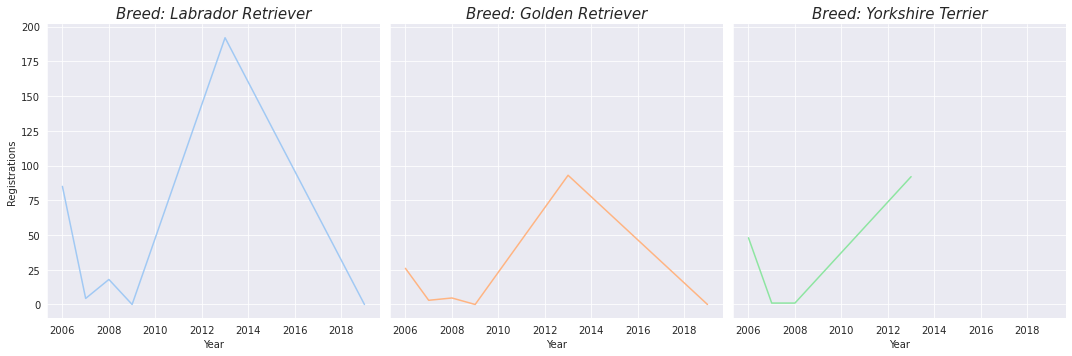

In [9]:
sns.set_style('darkgrid')
sns.set_palette("pastel")


Top_3_breeds = df["Breed"].isin(Top_3_Breeds['Breed'])

Top_3_Breed_df = df[Top_3_breeds]

g= sns.relplot(data=Top_3_Breed_df, x="Year",y="Registrations",kind='line', col='Breed',ci=None,  hue="Breed", legend=False)

g.set_titles("Breed: {col_name}", fontstyle='oblique', size=15)


plt.show()

> This showcases that the top three popular breeds for dog, has been in decline since 2013.
> 
> **Both Labrador & Golden Retriever** showcases a very similar trend, be it Positive or Negative. 
> 
> Both Breeds **became popular in 2009**, where they **stayed popular until 2013.**. This open's the route of exploring **"What the up and coming popular Breed?"**

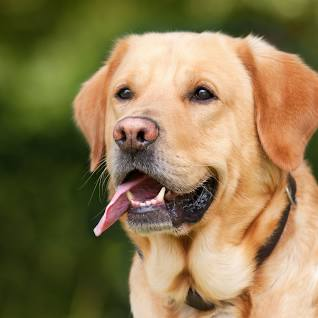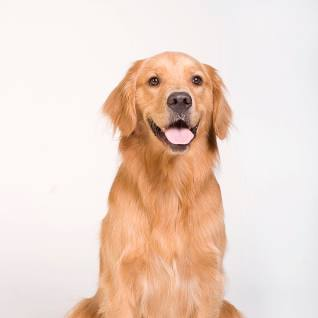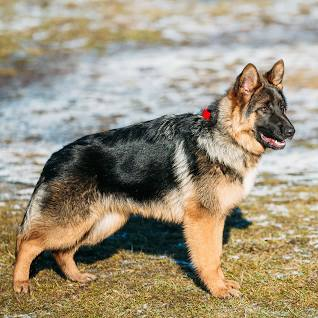

# Popularity of Breeds Based On Clubs 📍🐕📈 <a class="anchor"  id="question_3"></a>

> As most of the data was gathered based on clubs, we need to understand if the **Labrador & Golden Retriever** are also as popular based on different clubs as well. 
> 
> There was a total of **17** unique clubs where dogs were registered in.

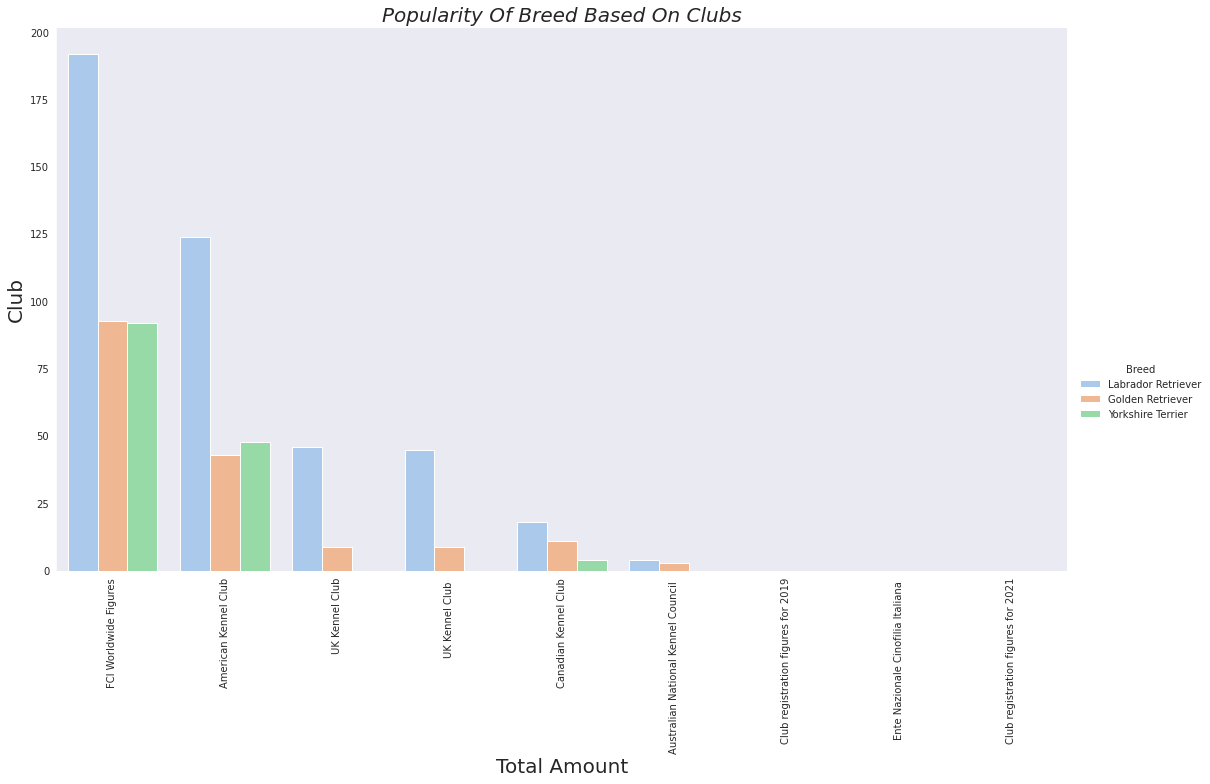

In [10]:
sns.set_style("dark")
sns.set_palette("pastel")

df1 = Top_3_Breed_df.groupby(['Club','Breed'])['Registrations'].sum().reset_index(name ='Total Amount')

sns.catplot(kind="bar",data=df1.sort_values(by='Total Amount', ascending=False), x="Club",y="Total Amount",hue="Breed", height=8.27, aspect=15/8.27)

# Labels
plt.xticks(rotation=90)
plt.title("Popularity Of Breed Based On Clubs", fontstyle='oblique', size=20)

plt.xlabel('Total Amount', size=20)
plt.ylabel('Club', size=20)

plt.show()


> We can see that according to almost 5 clubs, **Labrador Retriever** was the most registered dog surpassing it's close contender **Golden Retriever** by a huge mile.
> 
> Whereas, **German Shepherd** even though has less popularity compared to Golden Retriever before, but the graph showcased that **based on different locations**, German Shepherd was always **the second Popular Breed.**

# Distribution Of Registrations Per Location 🔢📌 <a class="anchor"  id="question_4"></a>

> It is within our analysis scope to research the distribution of registrations per location, to deterimine if the data gathered is biased or not. 
> 
> The popularity of Breeds Visuals showcased different results based on Location.
> 
> Where **Golden Retreiever** took the **3rd position** but **Overall based on Breed** it was marked **2nd overall** due to it's Boosted registrations from one place, which was **"FCI World Wide Figures"**.
> 
> Whereas, **German Shepherd** was 2nd position based on Location but Overall it was at 3rd Position for Popularity.
> 

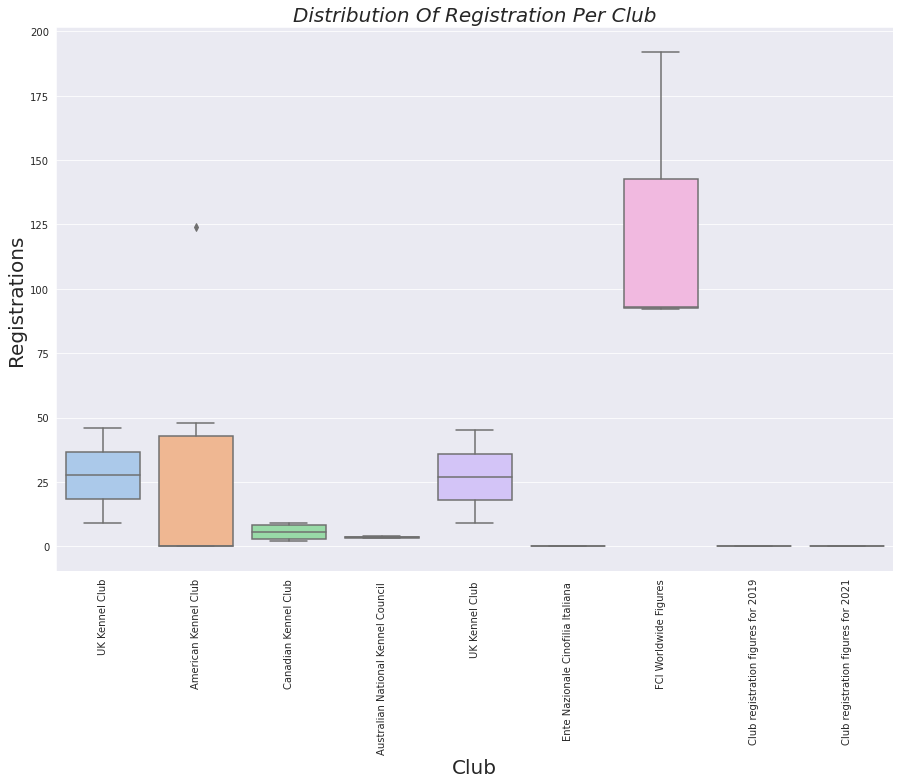

In [11]:
sns.set_style('darkgrid')
sns.set_palette("pastel")

fig = plt.figure(figsize=(15,10))

Reg_Club_df = Top_3_Breed_df


sns.boxplot(x='Club', y = 'Registrations', data=Reg_Club_df)


# Labels

plt.xticks(rotation=90)
plt.title("Distribution Of Registration Per Club", fontstyle="oblique", size=20)

plt.xlabel('Club', size=20)
plt.ylabel('Registrations', size=20)


plt.show()


This visual showcases a clear bias of data being collected from FCI Worldwide Figures, where the range of registrations from **90 Till 180** were collected from this club.


This visual confirms my **Hypothesis**, of **Golden Retriever** being **Overall 2nd Place** due to Boosted registrations from one place.

This also represents the most Popular Club is **FCI Worldwide Figures** by a landslide figures, with **lowest registered** ever recorded was just shy of 100 and **highest** was almost 200, this is only considering the **Top 3 Popular Breeds**

# Conclusion 🎉🎉 <a class="anchor"  id="insight_1"></a>

> Follows are the finds i was able to discover from all these visualization:
> 
> * Overall Labrador Retriever Took the first position for Overall Popular Breed, Trailed by Golden Retriever and German Shepherd
> 
> * Upon checking, Popularity of Breed Per Location, It was Found that Golden Retriever came at the 3rd Position, whereas German Shepherd was more Popular.
> 
> * Further Analysis into Registration Distribution, it was concluced that the Popularity of Golden Retriever was Boosted Overall due to the Registrations it had in FCI Worldwide Figures Club. Showcasing that we could have a Biased Data with respect to one Club
> 
> * **Hence, Concluding that Breed Popularity is based on Location Popularity.**
> 